### Estudo do Valor Esperado de Um circuito em duas perspectivas
* standart basis measurement
* utilizando um observável

Todas as medidas de um circuito apenas são realizadas medindo-se a projeção do estado quântico no Eixo Z. Base Sigma Pauli Z. Esta é chamada Standard Basis Measurement. 

Exemplo:

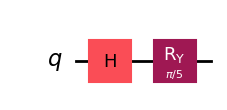

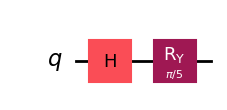

In [12]:
from qiskit import QuantumCircuit
import math
# Create a circuit with a register of three qubits
circ = QuantumCircuit(1)
# H gate on qubit 0, putting this qubit in a superposition of |0> + |1>.
circ.h(0)
circ.ry(math.pi/5, 0)

# A CX (CNOT) gate on control qubit 0 and target qubit 1 generating a Bell state.

# CX (CNOT) gate on control qubit 0 and target qubit 2 resulting in a GHZ state.

# Draw the circuit
circ.draw('mpl')

Para este circuito obtemos inicializamos os qubits em 0 e obtemos o seguinte estado quântico:

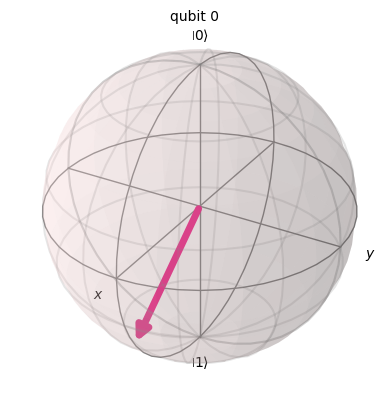

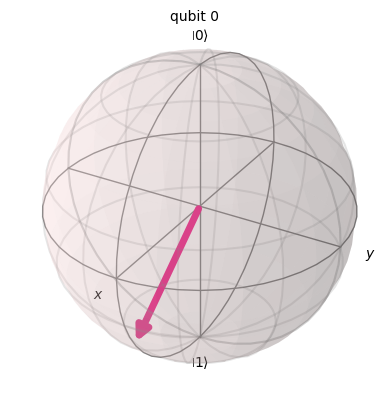

In [13]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere, plot_bloch_multivector
%matplotlib inline
# get state vector
sv = Statevector.from_instruction(circ).data

# plots
# plot_state_qsphere(sv)
plot_bloch_multivector(sv)

### Medindo o circuito. 

Medir o circuito significa calcular a projeção do vetor estado resultante no eixo Pauli Z e descobrir para este estado quântico qual o valor de alfa e beta, ou mais diretamente qual a probabilidade deste estado obter a medida |0> ou |1>, que são as únicas medidas reais possíveis para este circuito. A única coisa que alterações de um estado quântico provoca é a alteração da probabilidade de obter cada um dos dois estados possíveis. 

In [14]:
from qiskit_aer import AerSimulator
from qiskit import *


# Perform an ideal simulation
from qiskit.primitives import Sampler
circ.measure_all()


In [15]:
job = Sampler().run([circ])
result = job.result()
print(f" > Counts: {result.quasi_dists}")

 > Counts: [{0: np.float64(0.206107373853763), 1: np.float64(0.793892626146236)}]


In [16]:
Statevector.from_instruction(circ).probabilities_dict()

QiskitError: 'Cannot apply instruction with classical bits: measure'